# Churn Prediction 

Today competitive world businesses faces lot of challenges in retaining customer, cost of aquiring new customer is expensive than retaining the loyal customer who brings in the sales to company. So being able to predict when custoemr going to leave is key for a company to take action to retain the customer.

The most common use of churn prediction is telecoms industry. We are going to apply various algorithems using scikit-learn python library to predict the customer churn. 

Following are the steps we followed to predict the customer Churn.

•	Understand the Business problem.<br>
•	Extract the data from the source.<br>
•	Clean the data.<br>
•	Do Exploratory analysis of data.<br>
•	Select the features for model.<br>
•	Identify the models for binary classification problem.<br>
•	Fit Model.<br>
•	Make predictions.<br>
•	Evaluate models and choose the best model.

In [4]:
#Importing libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [5]:
#Importing data for analysis.
df = pd.read_csv("C:\\Users\\vgurumurthy\\Desktop\\Dataset\\churn.csv")

In [6]:
#Viewing data 
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [7]:
print("Number of rows:",df.shape[0])

Number of rows: 3333


# Exploratory data analysis

<a href="https://ibb.co/iugMuw"><img src="https://preview.ibb.co/dk3qnG/2018_01_04_11h38_22.png" alt="2018_01_04_11h38_22" border="0"></a>



<a href="https://ibb.co/dS8qnG"><img src="https://preview.ibb.co/ktwzgb/2018_01_04_11h31_21.png" alt="2018_01_04_11h31_21" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'></a><br />

<a href="https://imgbb.com/"><img src="https://image.ibb.co/eXQ0Mb/2018_01_04_08h45_41.png" alt="2018_01_04_08h45_41" border="0"></a>

<a href="https://ibb.co/c6Ad7G"><img src="https://preview.ibb.co/hFo9Ew/2018_01_04_15h51_57.png" alt="2018_01_04_15h51_57" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'></a><br />

df.describe()

In [9]:
counts = df.describe().iloc[0]
pd.DataFrame(counts.tolist(),columns=["Count of Values"],index=counts.index.values)

,Count of Values
Account Length,3333.0
VMail Message,3333.0
Day Mins,3333.0
Eve Mins,3333.0
Night Mins,3333.0
Intl Mins,3333.0
CustServ Calls,3333.0
Churn,3333.0
Int'l Plan,3333.0
VMail Plan,3333.0


In [10]:
df = df.drop(["Phone","Area Code","State"],axis=1)
features = df.drop(["Churn"],axis=1).columns

In [11]:
df.dtypes

Account Length      int64
VMail Message       int64
Day Mins          float64
Eve Mins          float64
Night Mins        float64
Intl Mins         float64
CustServ Calls      int64
Churn               int64
Int'l Plan          int64
VMail Plan          int64
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
dtype: object

In [12]:
# Splitting Data into Training and test data.
df_train,df_test = train_test_split(df,test_size=0.25)

In [13]:
# Use RandomForest,fit and score the model.
Accuracy_score = []
for i in range(1,50):    
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(df_train[features],df_train["Churn"])
    pred_clf = clf.predict(df_test[features])
    probs = clf.predict_proba(df_test[features])
    score = clf.score(df_test[features], df_test["Churn"])
    Accuracy_score.append(clf.score(df_test[features], df_test["Churn"]))

In [14]:
#Find the best score.
max(Accuracy_score) 

0.95683453237410077

In [15]:
# Eavluation of model: Confusion matrix.
pd.DataFrame(confusion_matrix(df_test["Churn"],pred_clf),columns=["Predicted False","Predicted True"],index=["Actual False","Actual True"])

,Predicted False,Predicted True
Actual False,706,4
Actual True,32,92


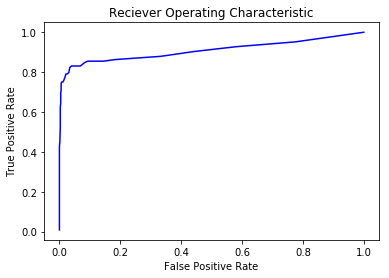

In [16]:
#Plotting of ROC Curve.
fpr, tpr, thresholds = roc_curve(df_test["Churn"],probs[:,1])
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
# Use Logistic Regression, fit and score model.
lr = LogisticRegression(penalty='l1')
lr.fit(df_train[features],df_train["Churn"])
lr_predict = lr.predict(df_test[features])

In [18]:
# Accuracy score for the model.
accuracy_score = lr.score(df_test[features],df_test["Churn"])
print("Accuracy : ", accuracy_score)

Accuracy :  0.854916067146


In [19]:
# Eavluation of model: Confusion matrix.
pd.DataFrame(confusion_matrix(df_test["Churn"],lr_predict),columns=["Predicted False","Predicted True"],index=["Actual False","Actual True"])

,Predicted False,Predicted True
Actual False,688,22
Actual True,99,25


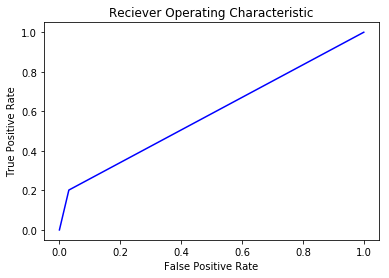

In [20]:
#Plotting of ROC Curve.
fpr, tpr, thresholds = roc_curve(df_test["Churn"],lr_predict)
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
#Use Naive Bayes model.
from sklearn.naive_bayes import BernoulliNB
clf1 = BernoulliNB()
clf1.fit(df_train[features],df_train["Churn"])
clf1_predict = clf1.predict(df_test[features])

In [22]:
# Accuracy score for the model.
accuracy_score = clf1.score(df_test[features],df_test["Churn"])
print("Accuracy : ", accuracy_score)

Accuracy :  0.840527577938


In [23]:
# Eavluation of model: Confusion matrix.
pd.DataFrame(confusion_matrix(df_test["Churn"],clf1_predict),columns=["Predicted False","Predicted True"],index=["Actual False","Actual True"])

,Predicted False,Predicted True
Actual False,684,26
Actual True,107,17


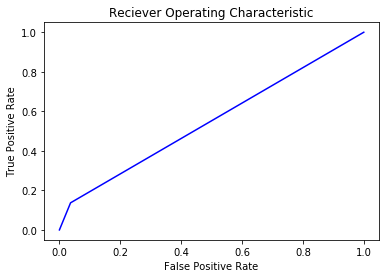

In [24]:
#Plotting of ROC Curve.
fpr, tpr, thresholds = roc_curve(df_test["Churn"],clf1_predict)
plt.title("Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
# Find out importance of each feature on predicting variable(churn).
df_f = pd.DataFrame(clf.feature_importances_, columns = ['importance'])
df_f['labels'] = features
df_f.sort_values('importance',ascending=False)

,importance,labels
2,0.144645,Day Mins
10,0.142189,Day Charge
6,0.121992,CustServ Calls
7,0.079792,Int'l Plan
3,0.069247,Eve Mins
12,0.062431,Eve Charge
16,0.044631,Intl Charge
5,0.044055,Intl Mins
15,0.043777,Intl Calls
4,0.036439,Night Mins


In [61]:
y_pos = np.arange(len(df_f['labels']))
y = df_f['importance'].tolist()
x = df_f['labels'].tolist()

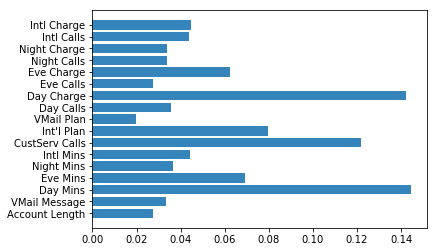

In [63]:
plt.barh(y_pos,y,align='center',alpha=0.9)
plt.yticks(y_pos,x)
plt.show()

## Conclusion:
From the visualization we can draw conclusion that top 5 features influences the churn predictions are<br><br>
1] Day Charge: Inorder to keep customers, offering a day calls relatively lower than other competitors may keep customer happy and lead to retention.<br>
2] Day Mins: Extending the number of minutes that a customer can use without any extra charge may keep them happy.<br>
3] Customer Service: Addressing each and every customer issues with highest priority may help to keep the customer happy.<br>
4] International Plan: Customers have friends and family in other nations, that is how they connect to them, so offering more international minutes at competitive rate may keep customers happy.<br>
5] Evening Mins: Adding more evening minutes may help customer to stick to current survice provider.